In [9]:
# Based on:
# http://nbviewer.jupyter.org/github/riddhishb/ipython-notebooks/blob/master/Cocktail%20Party%20Problem/PCA_ICA_FOBI.ipynb

%matplotlib inline

# Import packages.
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy.io import wavfile
from scipy import linalg as LA
from numpy.random import randn as RNDN

from sklearn.preprocessing import minmax_scale

def g(x):
    out = np.tanh(x)
    return out


def dg(x):
    out = 1 - g(x) * g(x)
    return out

In [10]:
from IPython.display import Audio
print('SOURCE 1')
Audio("you-can-stay-at-home.wav")

SOURCE 1


In [11]:
from IPython.display import Audio
print('SOURCE 2')
Audio("youre-so-funny-1.wav")

SOURCE 2


In [12]:
n = 200000

samplingRate, source1 = wavfile.read('you-can-stay-at-home.wav')
print source1.shape, samplingRate
samplingRate, source2 = wavfile.read('youre-so-funny-1.wav')
print source2.shape, samplingRate

source1 = minmax_scale(source1, feature_range=(-0.5,0.5))
source2 = minmax_scale(source2, feature_range=(-0.5,0.5))

source1 = source1[:n, 0]
source2 = source2[:n, 0]

(203064L, 2L) 44100
(235436L, 2L) 48000


c:\users\amonimo\anaconda\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int16 was converted to float64.
  warnings.warn(msg, _DataConversionWarning)


(200000L, 2L)


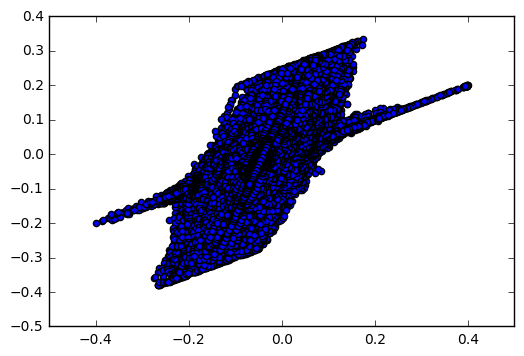

In [13]:
mixingMat = np.asarray([[0.8, 0.4],[.2, .6]])

x = np.dot(np.asarray([source1, source2]).T, mixingMat)

wavfile.write('mic1_mine.wav', samplingRate, minmax_scale(x[:,0],feature_range=(0,255)).astype(np.dtype('i2')))
wavfile.write('mic2_mine.wav', samplingRate, minmax_scale(x[:,1],feature_range=(0,255)).astype(np.dtype('i2')))

plt.scatter(x[:,0], x[:,1])
print x.shape

In [14]:
Audio("mic1_mine.wav")

In [15]:
Audio("mic2_mine.wav")

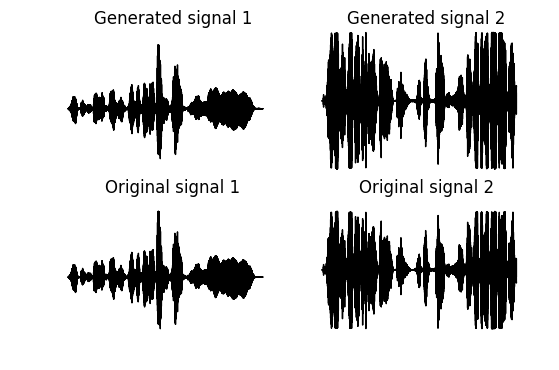

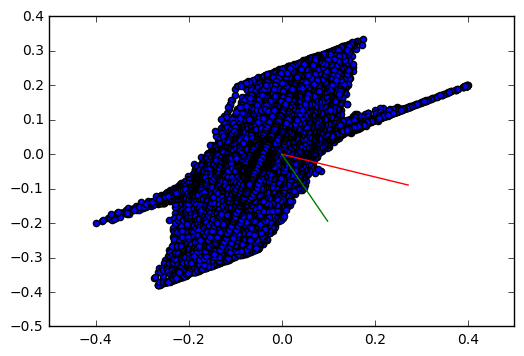

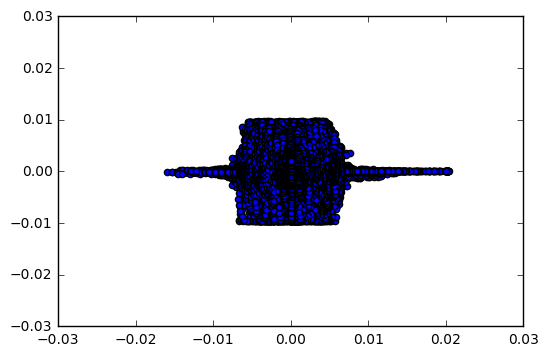

In [20]:
from sklearn.decomposition import FastICA, PCA

x = np.asarray(x)

ica = FastICA(n_components=2)

reco = ica.fit_transform(x)
reco = np.dot(x-ica.mean_, ica.components_.T)

# Plot the separated sources.
time = np.arange(0, float(n), 1)
time = time / samplingRate
time = time * 1000  # convert to milliseconds

plt.figure()
plt.subplot(2, 2, 1).set_axis_off()
plt.plot(time, reco[:,0], color='k')
plt.title("Generated signal 1")

plt.subplot(2, 2, 2).set_axis_off()
plt.plot(time, reco[:,1], color='k')
plt.title("Generated signal 2")


plt.subplot(2,2, 3).set_axis_off()
plt.plot(time, source1, color='k')
plt.title("Original signal 1")

plt.subplot(2, 2, 4).set_axis_off()
plt.plot(time, source2, color='k')
plt.title("Original signal 2")
plt.show()

# Storing numpy array as audio
wavfile.write('out1.wav', samplingRate, minmax_scale(reco[:,0], feature_range=(0,255)).astype(np.dtype('i2')))
wavfile.write('out2.wav', samplingRate, minmax_scale(reco[:,1],feature_range=(0,255)).astype(np.dtype('i2')))


lenght = 10

plt.scatter(x[:,0], x[:,1])
plt.plot([0, lenght*ica.components_[0][0]/2], [0, lenght*ica.components_[0][1]/2], color="red")
plt.plot([0, lenght*ica.components_[1][0]/2], [0, lenght*ica.components_[1][1]/2], color="green")
plt.show()

plt.scatter(reco[:,0], reco[:,1])
plt.show()

In [21]:
print('Separated signal 1 (output)')
Audio("out1.wav")

Separated signal 1 (output)


In [22]:
print('Separated signal 2 (output)')
Audio("out2.wav")

Separated signal 2 (output)
